<h2>Лабораторная работа №5</h2>
<h1 style="font-size: 30px; font-family: Georgia, serif;">Изучение моделей классификации и регрессии. </h1>

<h2>1. Набор данных диабета </h2>

In [40]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.datasets import load_diabetes
diabetes = load_diabetes()

In [2]:
print("Keys of diabetes(): \n{}".format(diabetes.keys()))

Keys of diabetes(): 
dict_keys(['data', 'target', 'frame', 'DESCR', 'feature_names', 'data_filename', 'target_filename', 'data_module'])


In [3]:
print("Shape of the array data for diabetes dataset: {}".format(diabetes.data.shape))

Shape of the array data for diabetes dataset: (442, 10)


In [4]:
print("Name of the features:\n{}".format(diabetes.feature_names))

Name of the features:
['age', 'sex', 'bmi', 'bp', 's1', 's2', 's3', 's4', 's5', 's6']


In [5]:
print(diabetes['DESCR']+"\n...")

.. _diabetes_dataset:

Diabetes dataset
----------------

Ten baseline variables, age, sex, body mass index, average blood
pressure, and six blood serum measurements were obtained for each of n =
442 diabetes patients, as well as the response of interest, a
quantitative measure of disease progression one year after baseline.

**Data Set Characteristics:**

  :Number of Instances: 442

  :Number of Attributes: First 10 columns are numeric predictive values

  :Target: Column 11 is a quantitative measure of disease progression one year after baseline

  :Attribute Information:
      - age     age in years
      - sex
      - bmi     body mass index
      - bp      average blood pressure
      - s1      tc, total serum cholesterol
      - s2      ldl, low-density lipoproteins
      - s3      hdl, high-density lipoproteins
      - s4      tch, total cholesterol / HDL
      - s5      ltg, possibly log of serum triglycerides level
      - s6      glu, blood sugar level

Note: Each of these 1

In [6]:
diabetes_data = pd.DataFrame(diabetes.data, columns=diabetes.feature_names)
diabetes_data.head()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,-0.092204
2,0.085299,0.050680,0.044451,-0.005670,-0.045599,-0.034194,-0.032356,-0.002592,0.002861,-0.025930
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022688,-0.009362
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031988,-0.046641


In [7]:
diabetes_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 442 entries, 0 to 441
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   age     442 non-null    float64
 1   sex     442 non-null    float64
 2   bmi     442 non-null    float64
 3   bp      442 non-null    float64
 4   s1      442 non-null    float64
 5   s2      442 non-null    float64
 6   s3      442 non-null    float64
 7   s4      442 non-null    float64
 8   s5      442 non-null    float64
 9   s6      442 non-null    float64
dtypes: float64(10)
memory usage: 34.7 KB


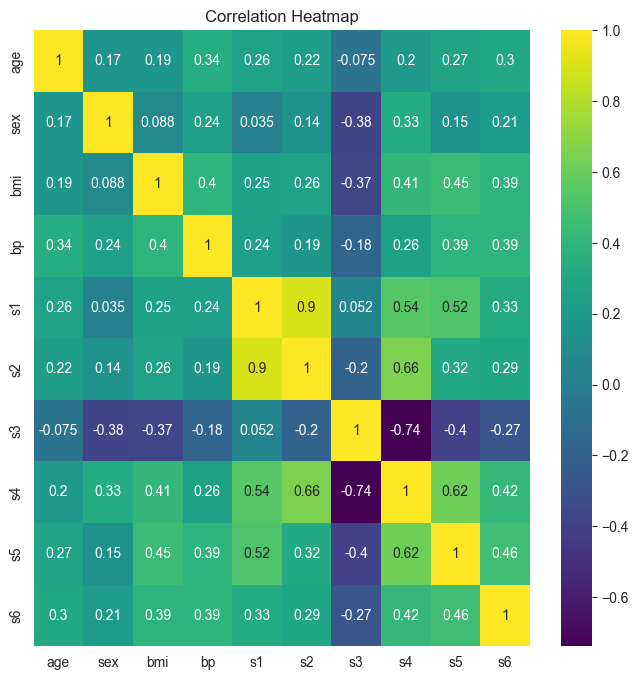

In [8]:
correlation = diabetes_data.corr()

plt.figure(figsize=(8, 8))
sns.heatmap(correlation, cmap='viridis', annot=True)
plt.title('Correlation Heatmap')
plt.show()

In [41]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split

In [42]:
X, y = diabetes.data, diabetes.target
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(331, 10)
(111, 10)
(331,)
(111,)


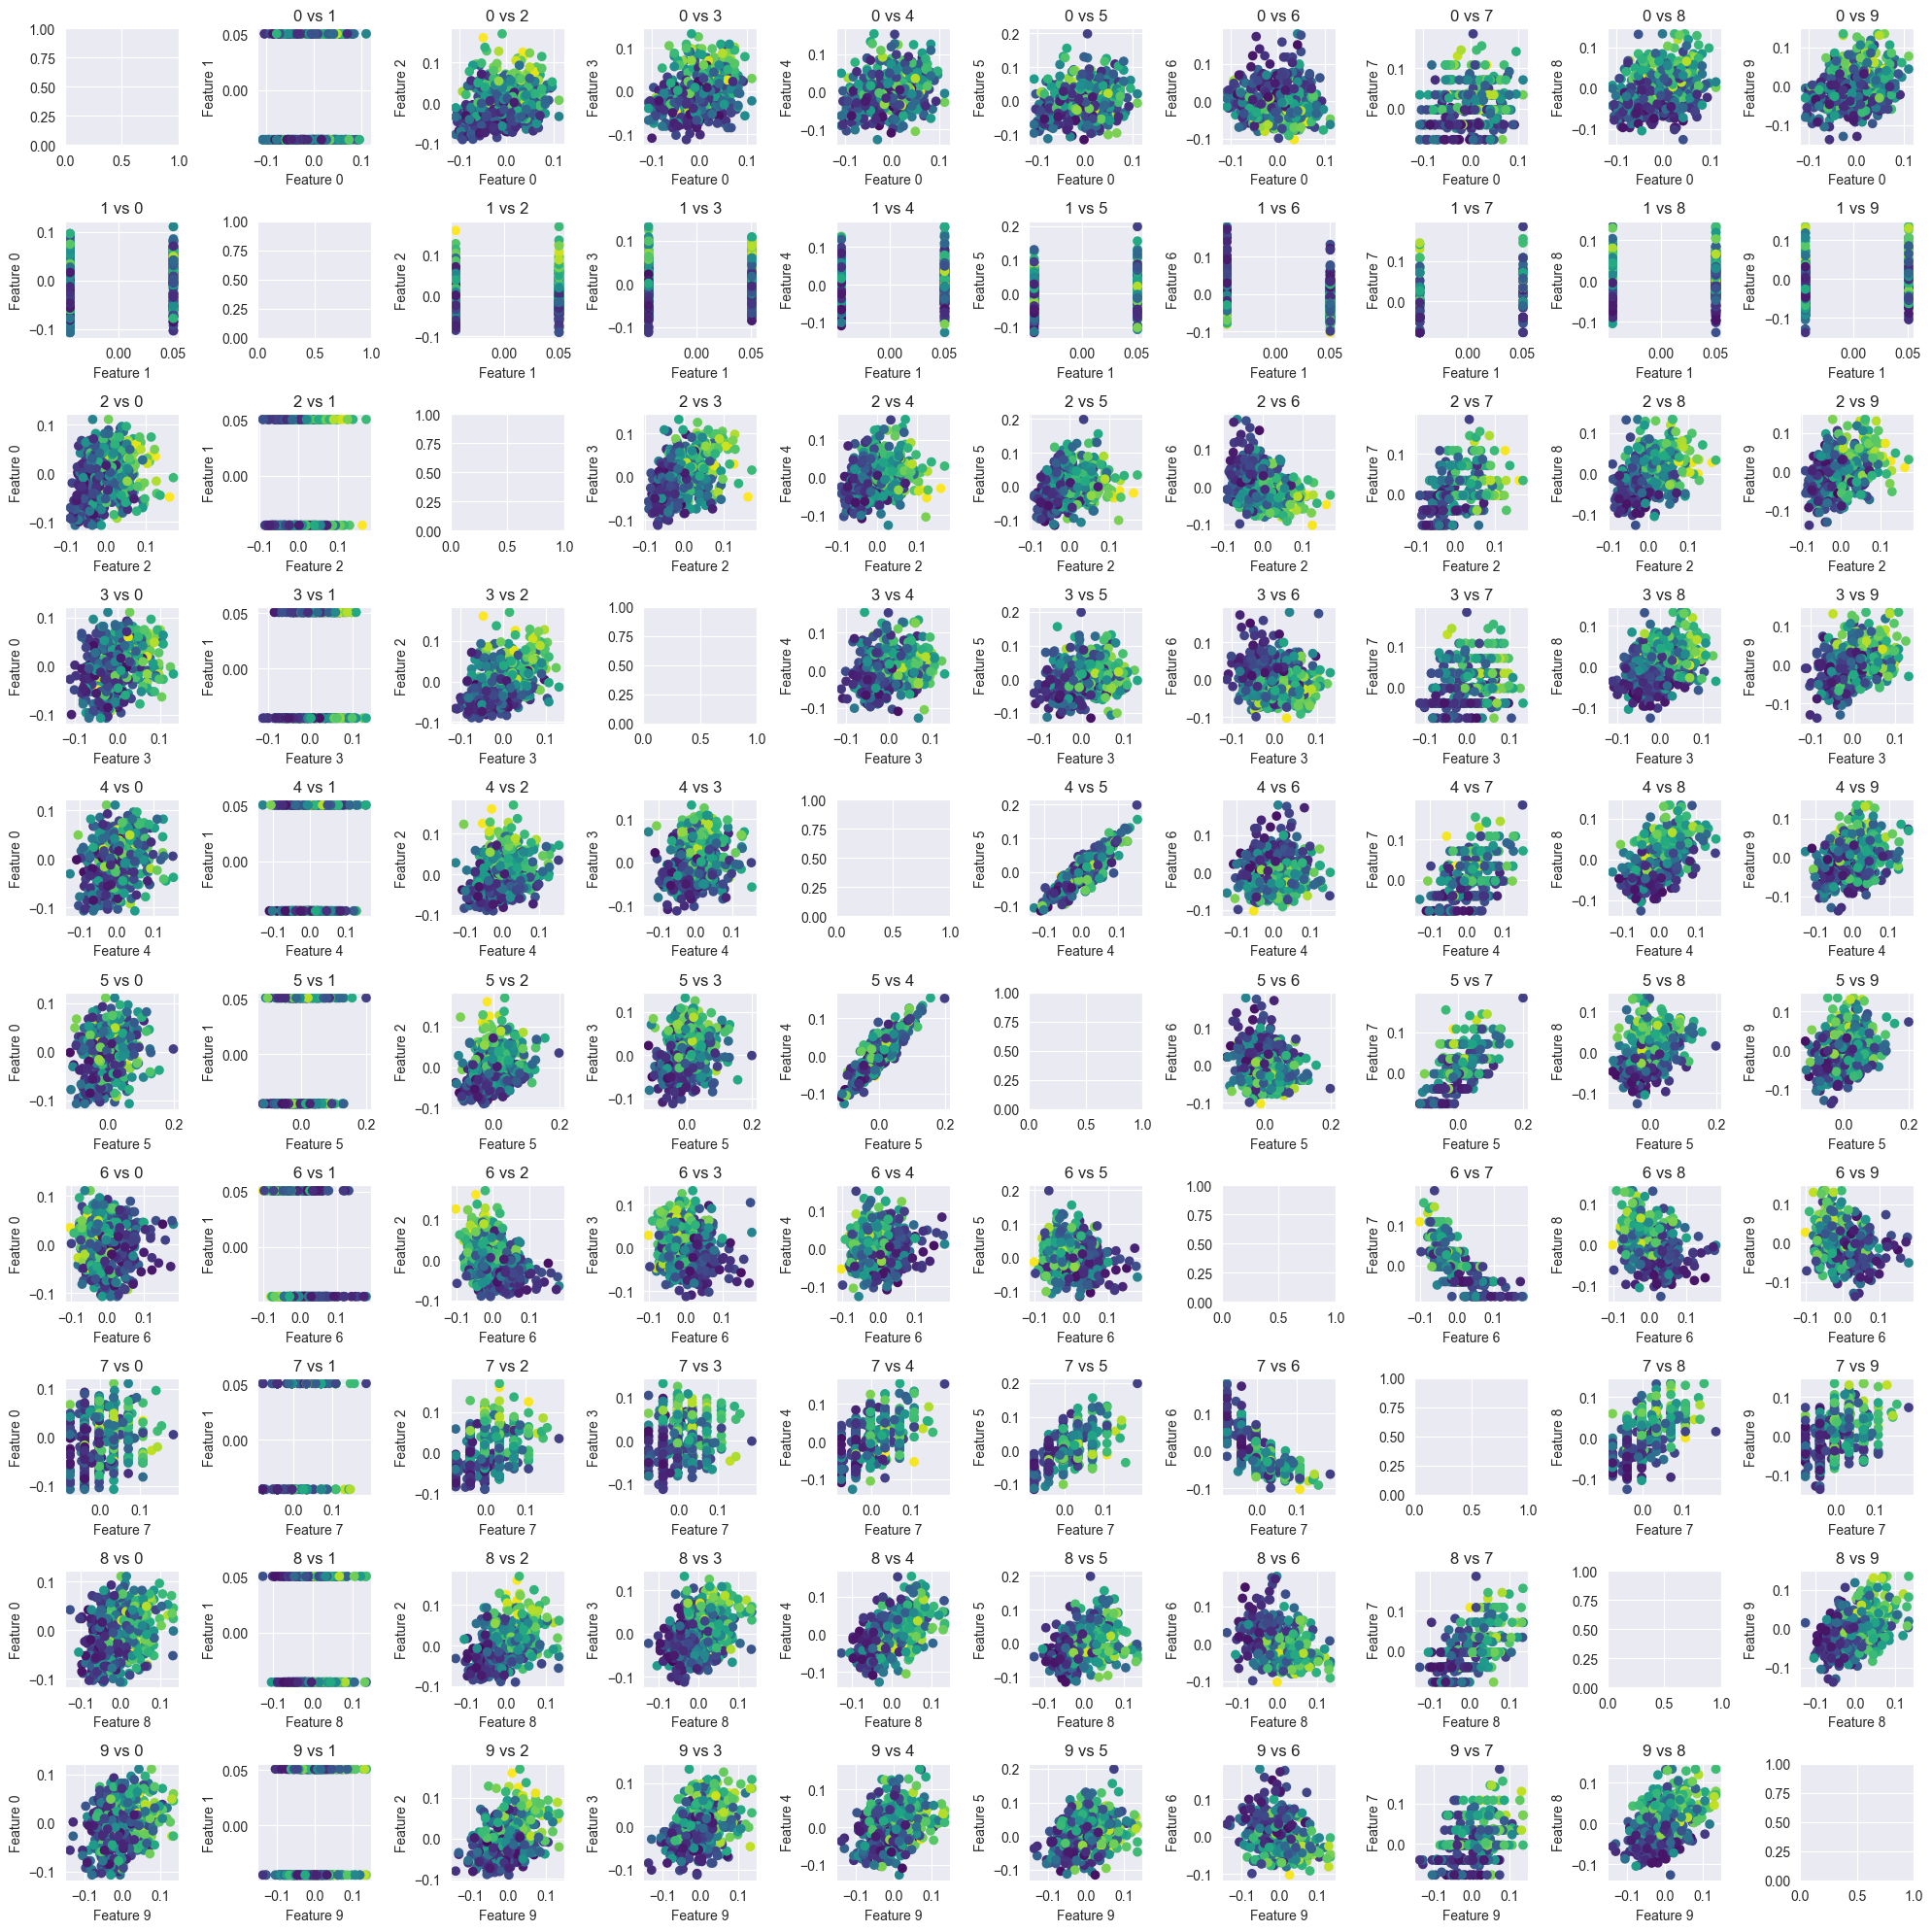

In [11]:
# Создание графиков для всех возможных комбинаций признаков
num_features = X.shape[1]

fig, axes = plt.subplots(num_features, num_features, figsize=(20, 20))

for i in range(num_features):
    for j in range(num_features):
        if i != j:
            axes[i, j].scatter(X[:, i], X[:, j], c=y, cmap='viridis')
            axes[i, j].set_xlabel("Feature {}".format(i))
            axes[i, j].set_ylabel("Feature {}".format(j))
            axes[i, j].set_title("{} vs {}".format(i, j))

plt.tight_layout()
plt.show()

<h1>KNeighborsClassifier</h1>

In [944]:
X, y = diabetes.data, diabetes.target
clf = KNeighborsClassifier(n_neighbors=5)
clf.fit(X_train, y_train)

KNeighborsClassifier()

In [67]:
print("Prediction on the test set: {}".format(clf.predict(X_test)))
print("Correctness on the test set: {:.2f}".format(clf.score(X_test,y_test)))

Prediction on the test set: [263.  67.  44.  31.  48.  78.  25. 275.  31. 265.  25. 259.  83.  31.
 275.  71. 200.  90.  37. 104.  40.  25.  71.  25. 116.  67.  87.  59.
  48. 111.  65.  25.  25. 214.  67.  66. 214.  77.  48.  66. 214. 100.
  67.  66.  91.  31.  59.  59.  42.  48.  44.  43.  48.  42.  66.  91.
  67.  37.  67.  69.  78.  25.  69.  42. 202.  60.  59. 268.  91.  52.
  59.  69.  42.  31.  44.  58.  51. 100. 122.  67.  67. 275.  39. 100.
  55.  72.  60.  58. 113.  65.  37.  44.  31.  51.  25.  48.  77.  70.
  44.  83.  50.  37.  90.  72. 275.  65. 115. 128. 113.  42. 275.]
Correctness on the test set: 0.00


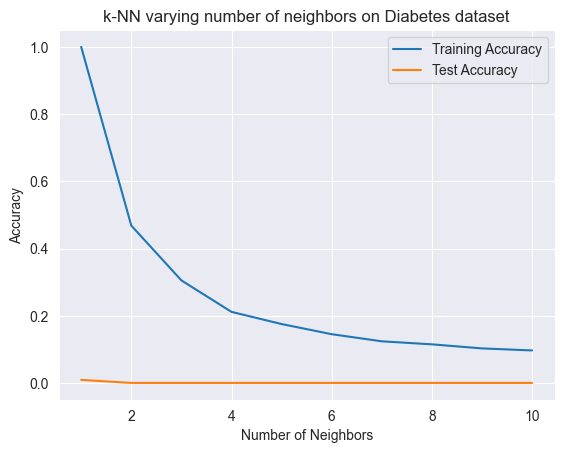

In [13]:
training_accuracy = []
test_accuracy = []
neighbors_settings = range(1, 11)

for n_neighbors in neighbors_settings:
    clf = KNeighborsClassifier(n_neighbors=n_neighbors)
    clf.fit(X_train, y_train)
    training_accuracy.append(clf.score(X_train, y_train))
    test_accuracy.append(clf.score(X_test, y_test))

plt.plot(neighbors_settings, training_accuracy, label="Training Accuracy")
plt.plot(neighbors_settings, test_accuracy, label="Test Accuracy")
plt.ylabel("Accuracy")
plt.xlabel("Number of Neighbors")
plt.legend()
plt.title("k-NN varying number of neighbors on Diabetes dataset")
plt.show()

<h1>KNeighborsRegressor</h1>

In [31]:
from sklearn.neighbors import KNeighborsRegressor

knn_regressor1 = KNeighborsRegressor(n_neighbors=1)
knn_regressor1.fit(X_train, y_train)

knn_regressor3 = KNeighborsRegressor(n_neighbors=3)
knn_regressor3.fit(X_train, y_train)

KNeighborsRegressor(n_neighbors=3)

In [32]:
print("Predictions on the test set with knn=1: \n{}".format(knn_regressor1.predict(X_test)))

Predictions on the test set with knn=1: 
[253.6 188.6 183.2 138.4 177.8 189.6 111.8 229.  178.  266.8 147.6 193.8
 136.4  55.6 297.4  73.6  97.2  83.8 130.8 214.4 173.6 115.2 167.4 101.
 186.8 175.6  97.2  75.  172.4 144.2 205.4  63.8 161.6 190.8 110.2 159.2
 199.4 141.2 121.4 140.8 155.6 173.8 140.6 175.6 134.2  84.6 110.4 127.2
 107.4 209.2 130.2  78.2 183.6 105.  227.4 160.4 155.  104.6 119.2 175.8
 159.8 141.6 150.4 100.2 279.2 128.4  91.2 269.2 183.2  88.4 118.  151.6
  74.8  97.8 126.2 140.4 127.4 223.6 236.6 191.2 111.6 219.8  69.6 169.4
  87.6  92.6 112.  145.8 117.  153.2 115.2  92.8  67.6 172.   92.4 106.6
 208.4 173.8 113.2 104.4 141.6 128.2 226.   87.  247.6 147.6 223.6 217.2
 149.   72.6 182. ]


In [33]:
print("Predictions on the test set with knn=3: \n{}".format(knn_regressor3.predict(X_test)))

Predictions on the test set with knn=3: 
[247.33333333 181.66666667 158.33333333 116.66666667 185.66666667
 222.66666667  81.         218.66666667 163.         270.33333333
 167.66666667 197.66666667 133.33333333  68.33333333 294.
  60.         132.33333333  70.33333333 123.         249.66666667
 207.33333333 155.33333333 167.         108.66666667 203.
 190.33333333 101.66666667  65.33333333 189.33333333 186.33333333
 229.          63.66666667 176.33333333 222.          88.66666667
 161.66666667 190.33333333 110.66666667 118.33333333 161.33333333
 157.         155.33333333 151.66666667 206.66666667 145.
  66.66666667 118.33333333 100.66666667 140.33333333 219.
 116.33333333  77.         204.33333333 124.         275.33333333
 136.66666667 145.66666667 111.33333333 110.66666667 215.33333333
 178.33333333  89.33333333 135.         113.         270.66666667
 162.66666667  57.66666667 284.33333333 196.          84.33333333
 131.33333333 169.33333333  80.         110.33333333 166.33333333
 

In [34]:
print("R^2 on the test set with knn=1: {:.2f}".format(knn_regressor1.score(X_test,y_test)))
print("R^2 on the test set with knn=3: {:.2f}".format(knn_regressor3.score(X_test,y_test)))

R^2 on the test set with knn=1: 0.19
R^2 on the test set with knn=3: 0.15


In [35]:
print("Correctness on the train set with knn=1: {:.2f}".format(knn_regressor1.score(X_train,y_train)))
print("Correctness on the train set with knn=3: {:.2f}".format(knn_regressor3.score(X_train,y_train)))

Correctness on the train set with knn=1: 0.62
Correctness on the train set with knn=3: 0.71


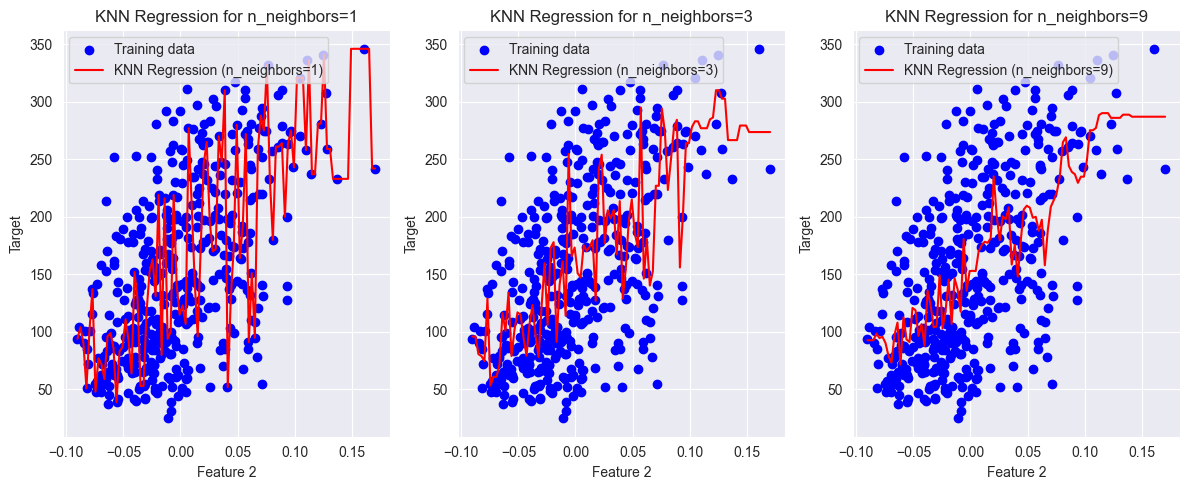

In [36]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsRegressor

# Selecting a single feature for demonstration
feature_index = 2  # Change this index to visualize different features

# Reshape to comply with scikit-learn's requirements
X_feature = X[:, feature_index].reshape(-1, 1)

# Create subplots
fig, axes = plt.subplots(1, 3, figsize=(12, 5))

for i, n_neighbors in enumerate([1, 3, 9], start=1):
    # Initialize KNeighborsRegressor with different n_neighbors
    knn = KNeighborsRegressor(n_neighbors=n_neighbors)
    knn.fit(X_feature, y)

    # Generating test data for visualization
    X_test = np.linspace(X_feature.min(), X_feature.max(), 100).reshape(-1, 1)
    y_pred = knn.predict(X_test)

    # Plotting on each subplot
    axes[i - 1].scatter(X_feature, y, label='Training data', c='b')
    axes[i - 1].plot(X_test, y_pred, label=f'KNN Regression (n_neighbors={n_neighbors})', c='r')
    axes[i - 1].set_xlabel(f"Feature {feature_index}")
    axes[i - 1].set_ylabel("Target")
    axes[i - 1].legend()
    axes[i - 1].set_title(f"KNN Regression for n_neighbors={n_neighbors}")

plt.tight_layout()
plt.show()

<h1>LinearRegression</h1>

In [43]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression().fit(X_train, y_train)

In [44]:
print("lr.coef_:{}".format(lr.coef_))
print("lr.intercept_:{}".format(lr.intercept_))

lr.coef_:[ -43.26198867 -208.66589855  593.40654802  302.89100542 -560.19094014
  261.40753499   -8.86674758  135.93174293  703.18354112   28.34977176]
lr.intercept_:153.06786205925664


In [45]:
print("Correctness on the train set: {:.2f}".format(lr.score(X_train,y_train)))
print("Correctness on the test set: {:.2f}".format(lr.score(X_test,y_test)))

Correctness on the train set: 0.56
Correctness on the test set: 0.36


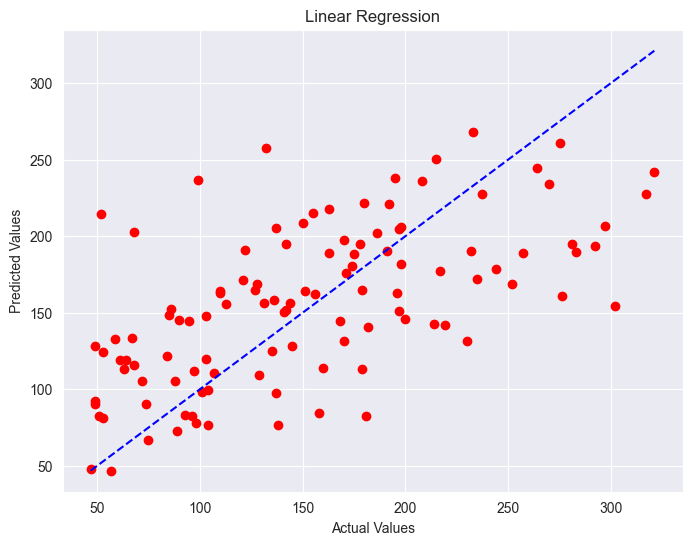

In [46]:
y_pred = lr.predict(X_test)

plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, color='red')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='blue', linestyle='--')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Linear Regression')
plt.show()

<h1>Ridge</h1>

In [47]:
from sklearn.linear_model import Ridge
ridge = Ridge().fit(X_train,y_train)
ridge01 = Ridge(alpha=0.1).fit(X_train,y_train)
ridge10 = Ridge(alpha=10).fit(X_train,y_train)

In [48]:
print("Correctness on the train set: {:.2f}".format(ridge.score(X_train,y_train)))
print("Correctness on the test set: {:.2f}".format(ridge.score(X_test,y_test)))

Correctness on the train set: 0.46
Correctness on the test set: 0.36


In [49]:
print("Correctness on the train set: {:.2f}".format(ridge01.score(X_train,y_train)))
print("Correctness on the test set: {:.2f}".format(ridge01.score(X_test,y_test)))

Correctness on the train set: 0.55
Correctness on the test set: 0.37


In [50]:
print("Correctness on the train set: {:.2f}".format(ridge10.score(X_train,y_train)))
print("Correctness on the test set: {:.2f}".format(ridge10.score(X_test,y_test)))

Correctness on the train set: 0.17
Correctness on the test set: 0.14


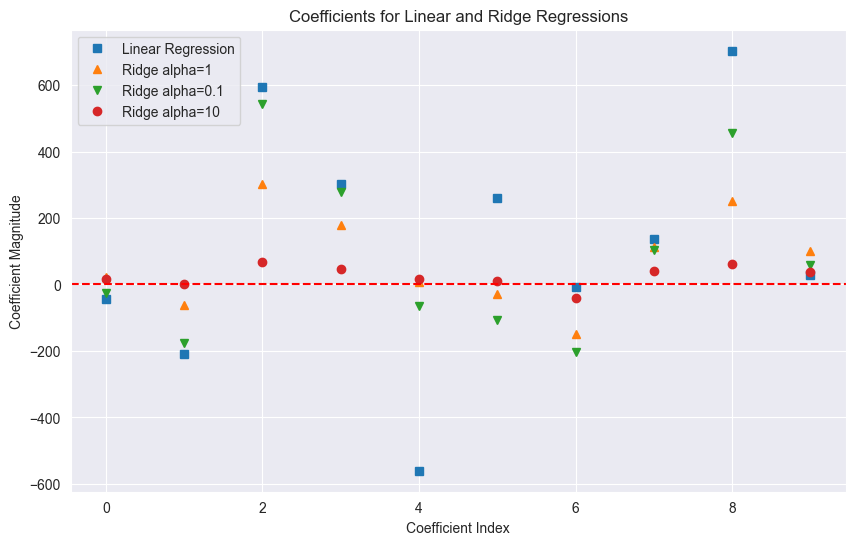

In [51]:
plt.figure(figsize=(10, 6))

plt.plot(lr.coef_, 's', label="Linear Regression")
plt.plot(ridge.coef_, '^', label="Ridge alpha=1")
plt.plot(ridge01.coef_, 'v', label="Ridge alpha=0.1")
plt.plot(ridge10.coef_, 'o', label="Ridge alpha=10")

plt.axhline(0, color='red', linestyle='--')
plt.xlabel("Coefficient Index")
plt.ylabel("Coefficient Magnitude")
plt.title("Coefficients for Linear and Ridge Regressions")
plt.legend()
plt.show()

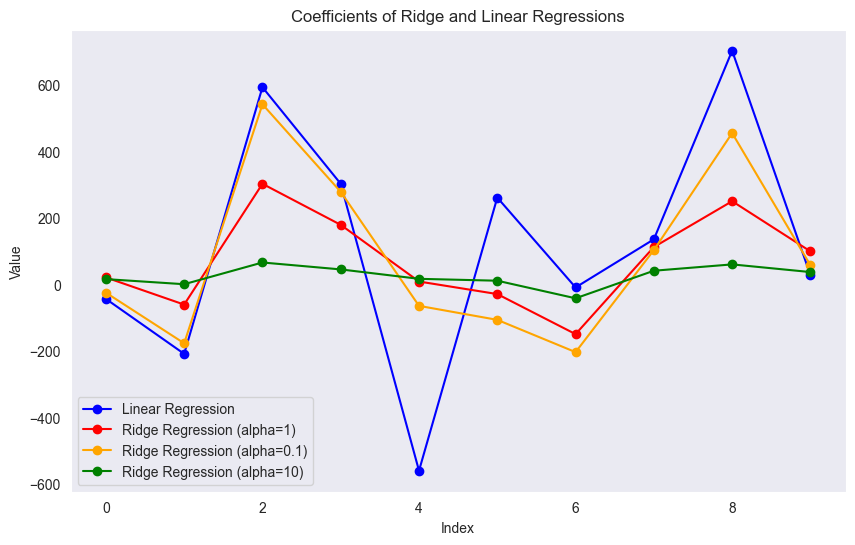

In [52]:
plt.figure(figsize=(10, 6))

plt.plot(lr.coef_, marker='o', label='Linear Regression', color='blue')
plt.plot(ridge.coef_, marker='o', label='Ridge Regression (alpha=1)', color='red')
plt.plot(ridge01.coef_, marker='o', label='Ridge Regression (alpha=0.1)', color='orange')
plt.plot(ridge10.coef_, marker='o', label='Ridge Regression (alpha=10)', color='green')

plt.xlabel('Index')
plt.ylabel('Value')

plt.title('Coefficients of Ridge and Linear Regressions')
plt.legend()
plt.grid()
plt.show()

<h1>Lasso</h1>

In [53]:
from sklearn.linear_model import Lasso
lasso = Lasso().fit(X_train, y_train)
lasso01 = Lasso(alpha=0.1, max_iter=100000).fit(X_train, y_train)
lasso10 = Lasso(alpha=10, max_iter=100000).fit(X_train, y_train)

In [54]:
print("Correctness on the train set: {:.2f}".format(lasso.score(X_train,y_train)))
print("Correctness on the test set: {:.2f}".format(lasso.score(X_test,y_test)))   
print("Number of the used features: {}".format(np.sum(lasso.coef_ != 0)))

Correctness on the train set: 0.41
Correctness on the test set: 0.28
Number of the used features: 2


In [55]:
print("Correctness on the train set: {:.2f}".format(lasso01.score(X_train,y_train)))
print("Correctness on the test set: {:.2f}".format(lasso01.score(X_test,y_test)))   
print("Number of the used features: {}".format(np.sum(lasso01.coef_ != 0)))

Correctness on the train set: 0.55
Correctness on the test set: 0.36
Number of the used features: 7


In [56]:
print("Correctness on the train set: {:.2f}".format(lasso10.score(X_train,y_train)))
print("Correctness on the test set: {:.2f}".format(lasso10.score(X_test,y_test)))   
print("Number of the used features: {}".format(np.sum(lasso10.coef_ != 0)))

Correctness on the train set: 0.00
Correctness on the test set: -0.00
Number of the used features: 0


In [59]:
print("Lasso alpha=1 coef:", lasso.coef_)
print("Lasso alpha=0.1 coef:", lasso01.coef_)
print("Lasso alpha=10 coef:", lasso10.coef_)

Lasso alpha=1 coef: [  0.          -0.         442.68199652   0.           0.
   0.          -0.           0.         330.75515534   0.        ]
Lasso alpha=0.1 coef: [  -0.         -129.77988734  592.21092352  240.11907082  -41.57065436
  -47.68511695 -219.12895742    0.          507.32681866    0.        ]
Lasso alpha=10 coef: [ 0.  0.  0.  0.  0.  0. -0.  0.  0.  0.]


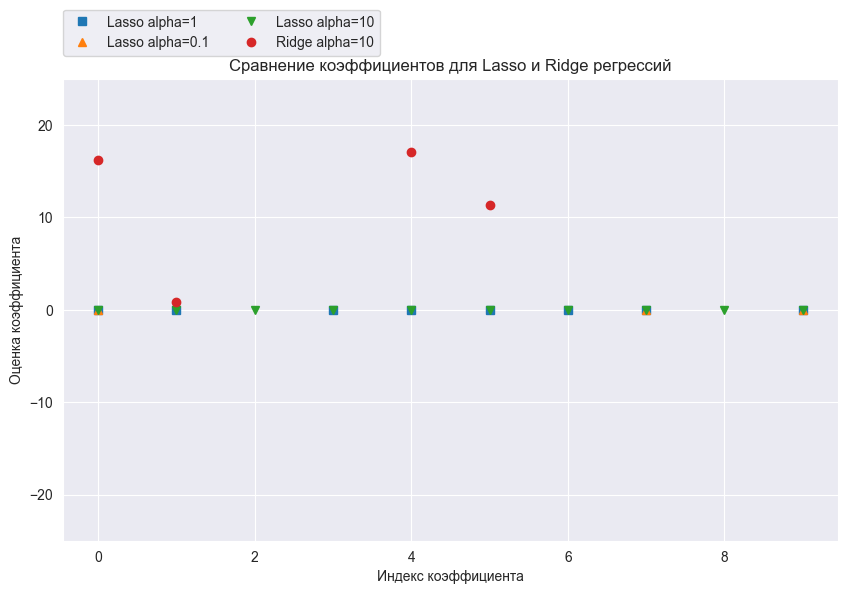

In [60]:
plt.figure(figsize=(10, 6))

plt.plot(lasso.coef_, 's', label="Lasso alpha=1")
plt.plot(lasso01.coef_, '^', label="Lasso alpha=0.1")
plt.plot(lasso10.coef_, 'v', label="Lasso alpha=10")
plt.plot(ridge10.coef_, 'o', label="Ridge alpha=10")

plt.legend(ncol=2, loc=(0, 1.05))

plt.ylim(-25, 25)
plt.title("Сравнение коэффициентов для Lasso и Ridge регрессий")
plt.xlabel("Индекс коэффициента")
plt.ylabel("Оценка коэффициента")
plt.show()

<h1>LogisticRegression</h1>

In [61]:
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression().fit(X_train,y_train)
print("Correctness on the train set C=1: {:.3f}".format(logreg.score(X_train,y_train)))
print("Correctness on the test set C=1: {:.3f}".format(logreg.score(X_test,y_test))) 

Correctness on the train set C=1: 0.033
Correctness on the test set C=1: 0.009


In [63]:
logreg100 = LogisticRegression(C=100).fit(X_train,y_train)
print("Correctness on the train set C=100: {:.3f}".format(logreg100.score(X_train,y_train)))
print("Correctness on the test set C=100: {:.3f}".format(logreg100.score(X_test,y_test)))   

Correctness on the train set C=100: 0.178
Correctness on the test set C=100: 0.009


In [65]:
logreg001 = LogisticRegression(C=0.01).fit(X_train,y_train)
print("Correctness on the train set C=0.1: {:.3f}".format(logreg001.score(X_train,y_train)))
print("Correctness on the test set C=0.1: {:.3f}".format(logreg001.score(X_test,y_test))) 

Correctness on the train set C=0.1: 0.030
Correctness on the test set C=0.1: 0.009


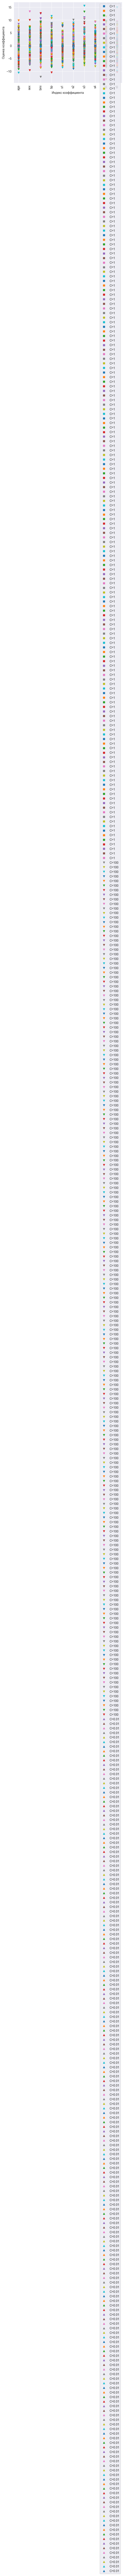

In [66]:
plt.plot(logreg.coef_.T, 's', label="C=1")
plt.plot(logreg100.coef_.T, 'v', label="C=100")
plt.plot(logreg001.coef_.T, '^', label="C=0.01")

plt.xticks(range(diabetes.data.shape[1]),diabetes.feature_names, rotation=90)
    
plt.xlabel("Индекс коэффициента")
plt.ylabel("Оценка коэффициента")
plt.legend()
plt.show()

<h1>Вывод Diabetes</h1>
В ходе работы различные модели регрессии и классификации были применены к набору данных diabetes для предсказания и классификации уровня прогрессирования заболевания.
 
Сначала загрузили набор данных, разделили на обучающий набор данных и тестовый и провели исследование. Далее используя разные методы обучали модель. Использование разных методов показало немного отличающиеся друг от друга прогнозы и оценки, что помогло нам лучше понять правильность результатов, сравнивая правильность и значения. Также были приведены различные визуализации. 
  
LinearRegression, KNeighborsRegressor, Ridge, Lasso, LogisticRegression - были применены для предсказания уровня прогрессирования диабета, используя разные количества соседей.

В основном результаты были между 20-60%. Тестировала выбирая разные количества соседей, также разные alpha и С значения для гребневой, Лассо и логистической регрессий. Заключительное сравнение эффективности моделей по метрикам и оценка их применимости для конкретных задач могут помочь выбрать наиболее подходящую модель для данных в наборе diabetes.
